In [9]:
import numpy as np

In [11]:
import pandas as pd

In [13]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

In [17]:
df = pd.read_csv('earthquakes.csv')

In [19]:
df.shape

(1137, 43)

In [13]:
df.dtypes

id                  object
magnitude          float64
type                object
title               object
date                object
time                 int64
updated              int64
url                 object
detailUrl           object
felt                 int64
cdi                  int64
mmi                  int64
alert               object
status              object
tsunami              int64
sig                  int64
net                 object
code                object
ids                 object
sources             object
types               object
nst                  int64
dmin               float64
rms                float64
gap                float64
magType             object
geometryType        object
depth              float64
latitude           float64
longitude          float64
place               object
distanceKM           int64
placeOnly           object
location            object
continent           object
country             object
subnational         object
c

C:\Users\brand\AppData\Local\Temp\ipykernel_17472\3154773485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country', y='magnitude', palette='Set3')


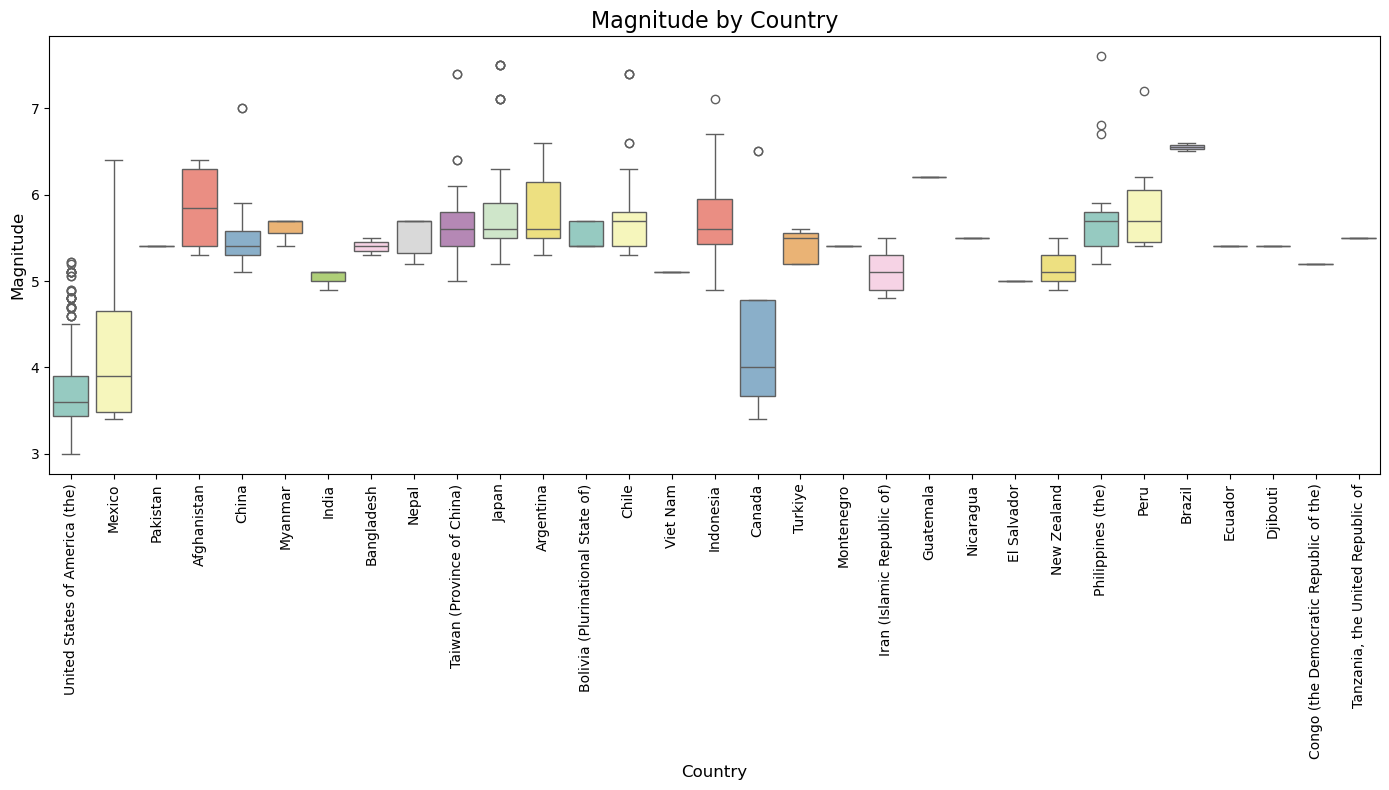

In [49]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='country', y='magnitude', palette='Set3')
plt.title("Magnitude by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Magnitude", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


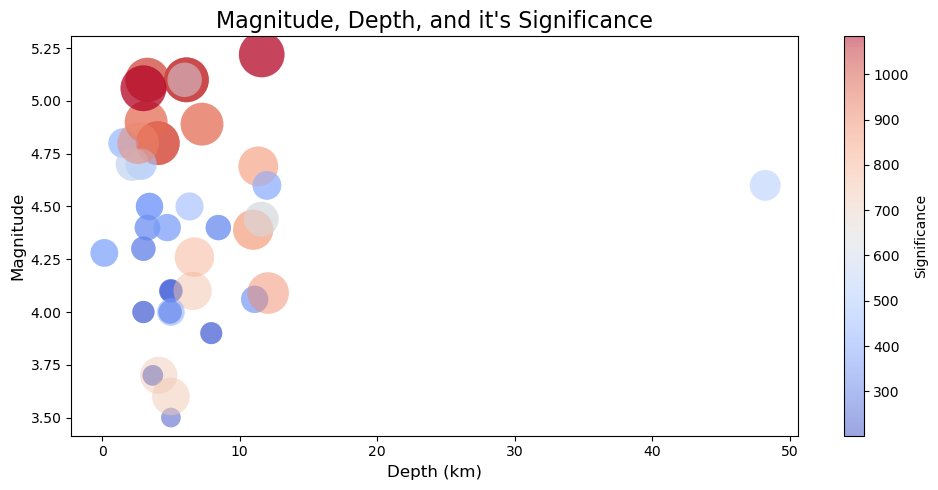

In [83]:
plt.figure(figsize=(10, 5))
plt.scatter(df['depth'], df['magnitude'], s=df['sig'], c=df['sig'], cmap='coolwarm', alpha=0.5, edgecolors='w', linewidth=0)
plt.colorbar(label='Significance')
plt.title("Magnitude, Depth, and it's Significance", fontsize=16)
plt.xlabel("Depth (km)", fontsize=12)
plt.ylabel("Magnitude", fontsize=12)
plt.tight_layout()
plt.show()


In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [21]:
clustering = df[['magnitude', 'depth']].dropna()


In [25]:
scaler = StandardScaler()

In [29]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [33]:
clustering_data_scaled = scaler.fit_transform(clustering)

In [35]:
clustering['cluster'] = kmeans.fit_predict(clustering_data_scaled)

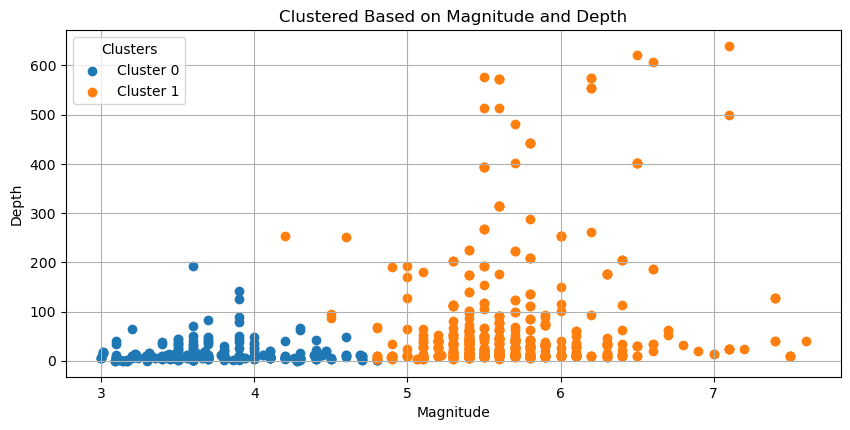

In [99]:
plt.figure(figsize=(10, 4.5))
for cluster in range(2):
    cluster_group = clustering[clustering['cluster'] == cluster]
    plt.scatter(
        cluster_group['magnitude'],
        cluster_group['depth'],
        label=f'Cluster {cluster}'
    )
plt.title('Clustered Based on Magnitude and Depth')
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

In [65]:
df = df.dropna()

In [67]:
print(df.isnull().values.any())

False
